#Reconocimiento facial

##Activar google drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Librerías y parches



In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## Cargar clasificadores haar


In [0]:
face_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/AngaritaCastillo_AlixAndrea/Clasificadores_Haar/haarcascade_eye.xml')
smile_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_smile.xml')
fullbody_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_fullbody.xml')
upperbody_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_upperbody.xml')
lowerbody_cascade=cv2.CascadeClassifier('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/opencv_haarcascades/haarcascade_lowerbody.xml')


## Imagen cargada a gray

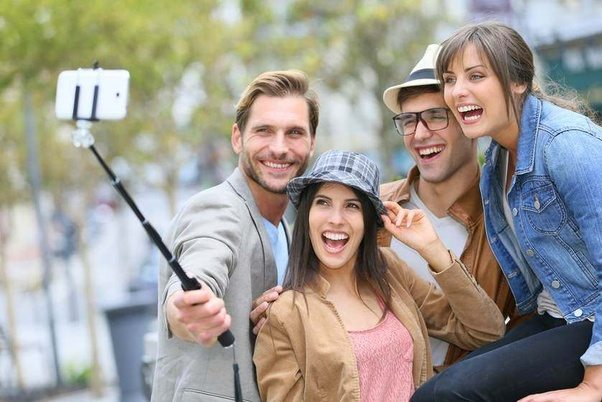

In [0]:
img=cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/foto.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

## Identificar caras


[[380  87  84  84]
 [235  98  88  88]
 [302 180  70  70]]


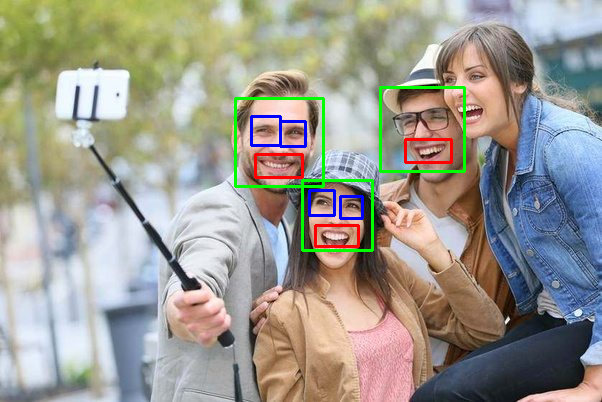

In [0]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.1,5)

print(faces)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=img[y:y+h,x:x+w]
  smiles=smile_cascade.detectMultiScale(roi_gray,1.1,5)
  eyes=eye_cascade.detectMultiScale(roi_gray,1.1,1)
  for (x,y,w,h) in smiles:
    cv2.rectangle(roi_color,(x,y),(x+w,y+h),(0,0,255),2)
  for (x,y,w,h) in eyes:
    cv2.rectangle(roi_color,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(img)


##Identificar Cuerpos

[[410  67  89 178]
 [664 174  26  53]
 [162 209  33  67]
 [469 212 110 219]
 [375 209  99 198]
 [331 235  91 182]
 [110 318  32  65]
 [130 326  42  84]
 [172 335  49  97]
 [247 356  35  70]]


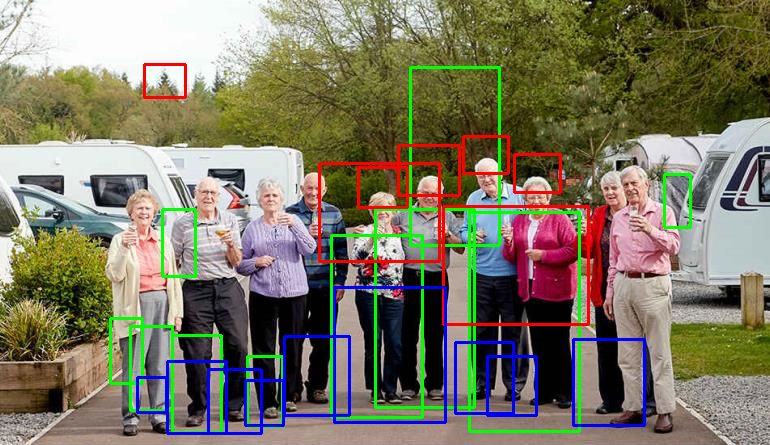

In [0]:
img=cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/foto4.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bodies=fullbody_cascade.detectMultiScale(gray,1.01,5);
upper=upperbody_cascade.detectMultiScale(gray,1.01,5);
lower=lowerbody_cascade.detectMultiScale(gray,1.01,5);

print(bodies)

for (x,y,w,h) in bodies:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  roi_gray=gray[y:y+h,x:x+w]

for (x,y,w,h) in upper:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
  roi_gray=gray[y:y+h,x:x+w]

for (x,y,w,h) in lower:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray=gray[y:y+h,x:x+w]

cv2_imshow(img)

## Video por cuadros

In [0]:
video = cv2.VideoCapture('/content/drive/My Drive/UPB_deep_learning_201902/images/familia_cantando.mp4')

length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
frames_to = int(length/2)
fps = video.get(cv2.CAP_PROP_FPS)
print(fps)

size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)),int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print(size)

out = cv2.VideoWriter('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/processed_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps-5, size)

print ('Total de frames: '+ str(length),'En proceso...\n', sep='\n')
count = 0

for x in range(frames_to):
  success,frame = video.read()
  img = frame

  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces=face_cascade.detectMultiScale(gray,1.3,5);

  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]

    smiles=smile_cascade.detectMultiScale(roi_gray,1.3,5);
    for (x,y,w,h) in smiles:
      cv2.rectangle(roi_color,(x,y),(x+w,y+h),(0,0,255),2)

    eyes=eye_cascade.detectMultiScale(roi_gray,1.12,5);
    for (x,y,w,h) in eyes:
      cv2.rectangle(roi_color,(x,y),(x+w,y+h),(255,0,0),2)

  count +=1

  out.write(img)
  
out.release()
print(str(count)+' frames procesados.')


30.0
(640, 360)
Total de frames: 1412
En proceso...

706 frames procesados.
